In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [4]:
pd.set_option('max_columns', None)

In [5]:
df=pd.read_csv(r'C:\Users\sidha\Desktop\Upgrad DS\2. Machine Learning\2. Linear Regression Assignment/day.csv')

### Dataset Analysis

In [6]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
df.shape

(730, 16)

In [8]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [10]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### EDA and Data Preparation

In [11]:
df.instant

0        1
1        2
2        3
3        4
4        5
      ... 
725    726
726    727
727    728
728    729
729    730
Name: instant, Length: 730, dtype: int64

In [12]:
df.dteday

0      01-01-2018
1      02-01-2018
2      03-01-2018
3      04-01-2018
4      05-01-2018
          ...    
725    27-12-2019
726    28-12-2019
727    29-12-2019
728    30-12-2019
729    31-12-2019
Name: dteday, Length: 730, dtype: object

- We can drop 'instant' and 'dteday'. It is of no use in our evaluation

In [13]:
df.drop(['instant','dteday'],axis=1,inplace=True)

In [14]:
df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [15]:
df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [16]:
def convert(i):
    if i == 1:
      return 'spring'
    elif i==2:
      return 'summer'
    elif i==3:
      return 'fall'
    elif i==4:
      return 'winter'

df.season=df.season.apply(convert)

In [17]:
df.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [18]:
def con(x):
  if x==1:
    return 'Clear'
  elif x==2:
    return 'mist+cloudy'
  elif x==3:
    return 'light rain+snow'
  elif x==4:
    return 'heavy rain+snow'

df.weathersit=df.weathersit.apply(con)

In [19]:
df.weathersit.value_counts()

Clear              463
mist+cloudy        246
light rain+snow     21
Name: weathersit, dtype: int64

#### Creating Dummies

In [20]:
seasons=pd.get_dummies(df.season,drop_first=True)
seasons.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [21]:
weather=pd.get_dummies(df.weathersit,drop_first=True)
weather.head()

,light rain+snow,mist+cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [22]:
df=pd.concat([df,seasons,weather],axis=1)

Now we have converted 'season' and 'weathersit' into categorical variables and have also created their dummies. Now after the successful concatination, we can drop the categorical columns.

In [23]:
df.drop(['season','weathersit'],axis=1,inplace=True)

In [24]:
df.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter,light rain+snow,mist+cloudy
0,0,1,0,1,1,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,0,1
1,0,1,0,2,1,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,0,1
2,0,1,0,3,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,0,0
3,0,1,0,4,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,0,0
4,0,1,0,5,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,0,0


As our target variable is 'cnt', which is the total of 'registered' and 'casual' users, we can surely drop 'registered' and 'casual' variables

In [25]:
df.drop(['registered','casual'],axis=1,inplace=True)

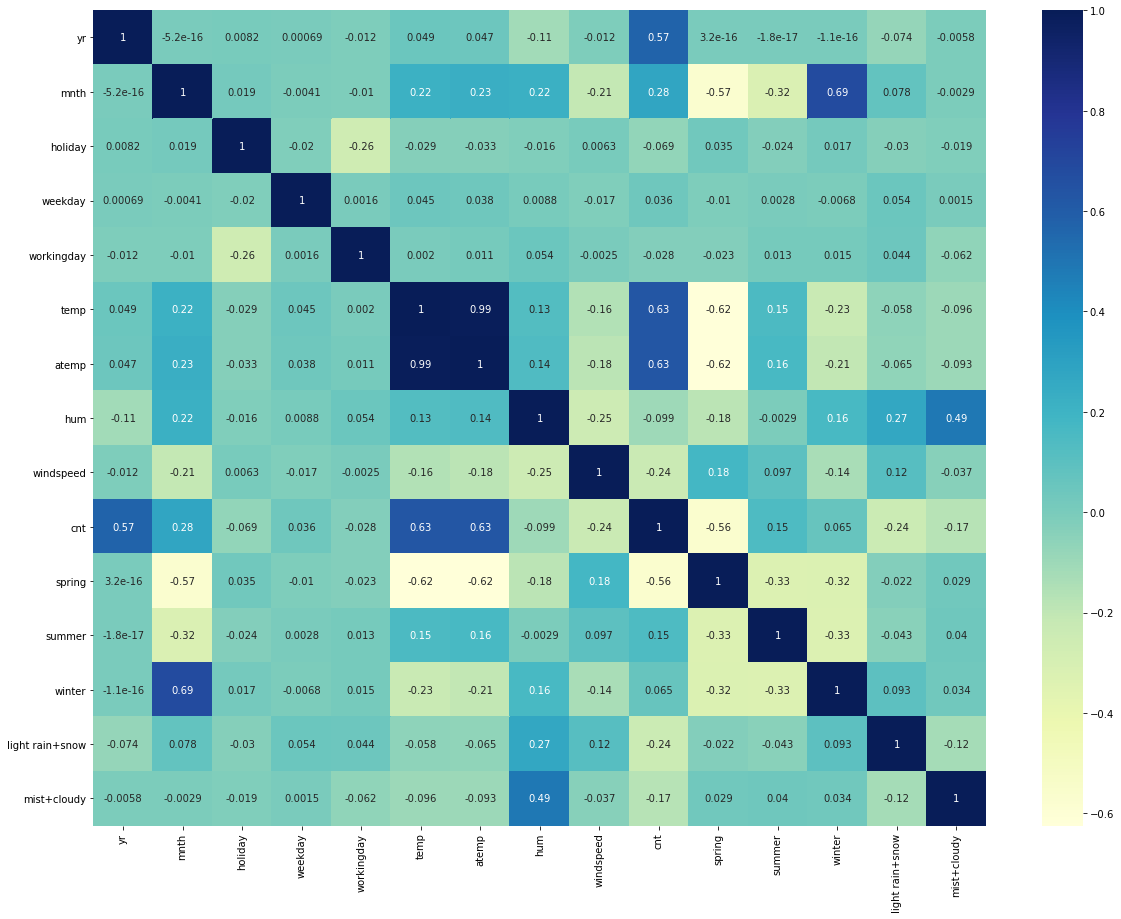

In [26]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
plt.show()

We can see that temp and atemp have very high correlation and they both are basically the same thing. They both represent temprature. So we wll drop temp and kepp atemp

In [27]:
df.drop('temp',axis=1,inplace=True)

In [28]:
df.head()

,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,light rain+snow,mist+cloudy
0,0,1,0,1,1,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,0,1,0,2,1,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,0,1,0,3,1,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,0,1,0,4,1,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,0,1,0,5,1,11.46350,43.6957,12.522300,1600,1,0,0,0,0


In [29]:
df.columns

Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'atemp', 'hum',
       'windspeed', 'cnt', 'spring', 'summer', 'winter', 'light rain+snow',
       'mist+cloudy'],
      dtype='object')

In [30]:
num_var=['atemp', 'hum','windspeed', 'cnt']
cat_var=['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'spring', 'summer', 'winter', 'light rain+snow','mist+cloudy']

<Figure size 1080x720 with 0 Axes>

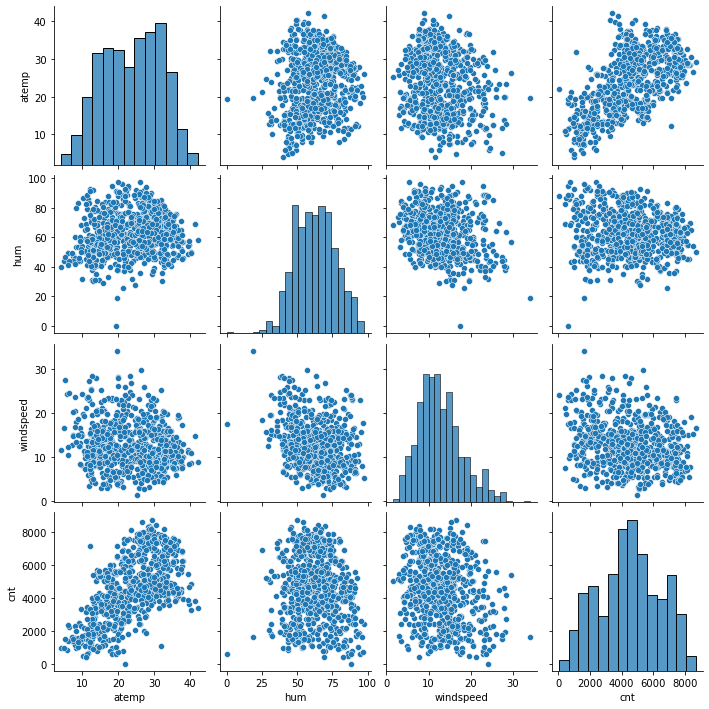

In [31]:
plt.figure(figsize=(15,10))
sns.pairplot(df, vars=['atemp', 'hum','windspeed', 'cnt'])
plt.show()

We can see that atemp and cnt are linearly related.

Now we will plot a boxplot for better understanding of data

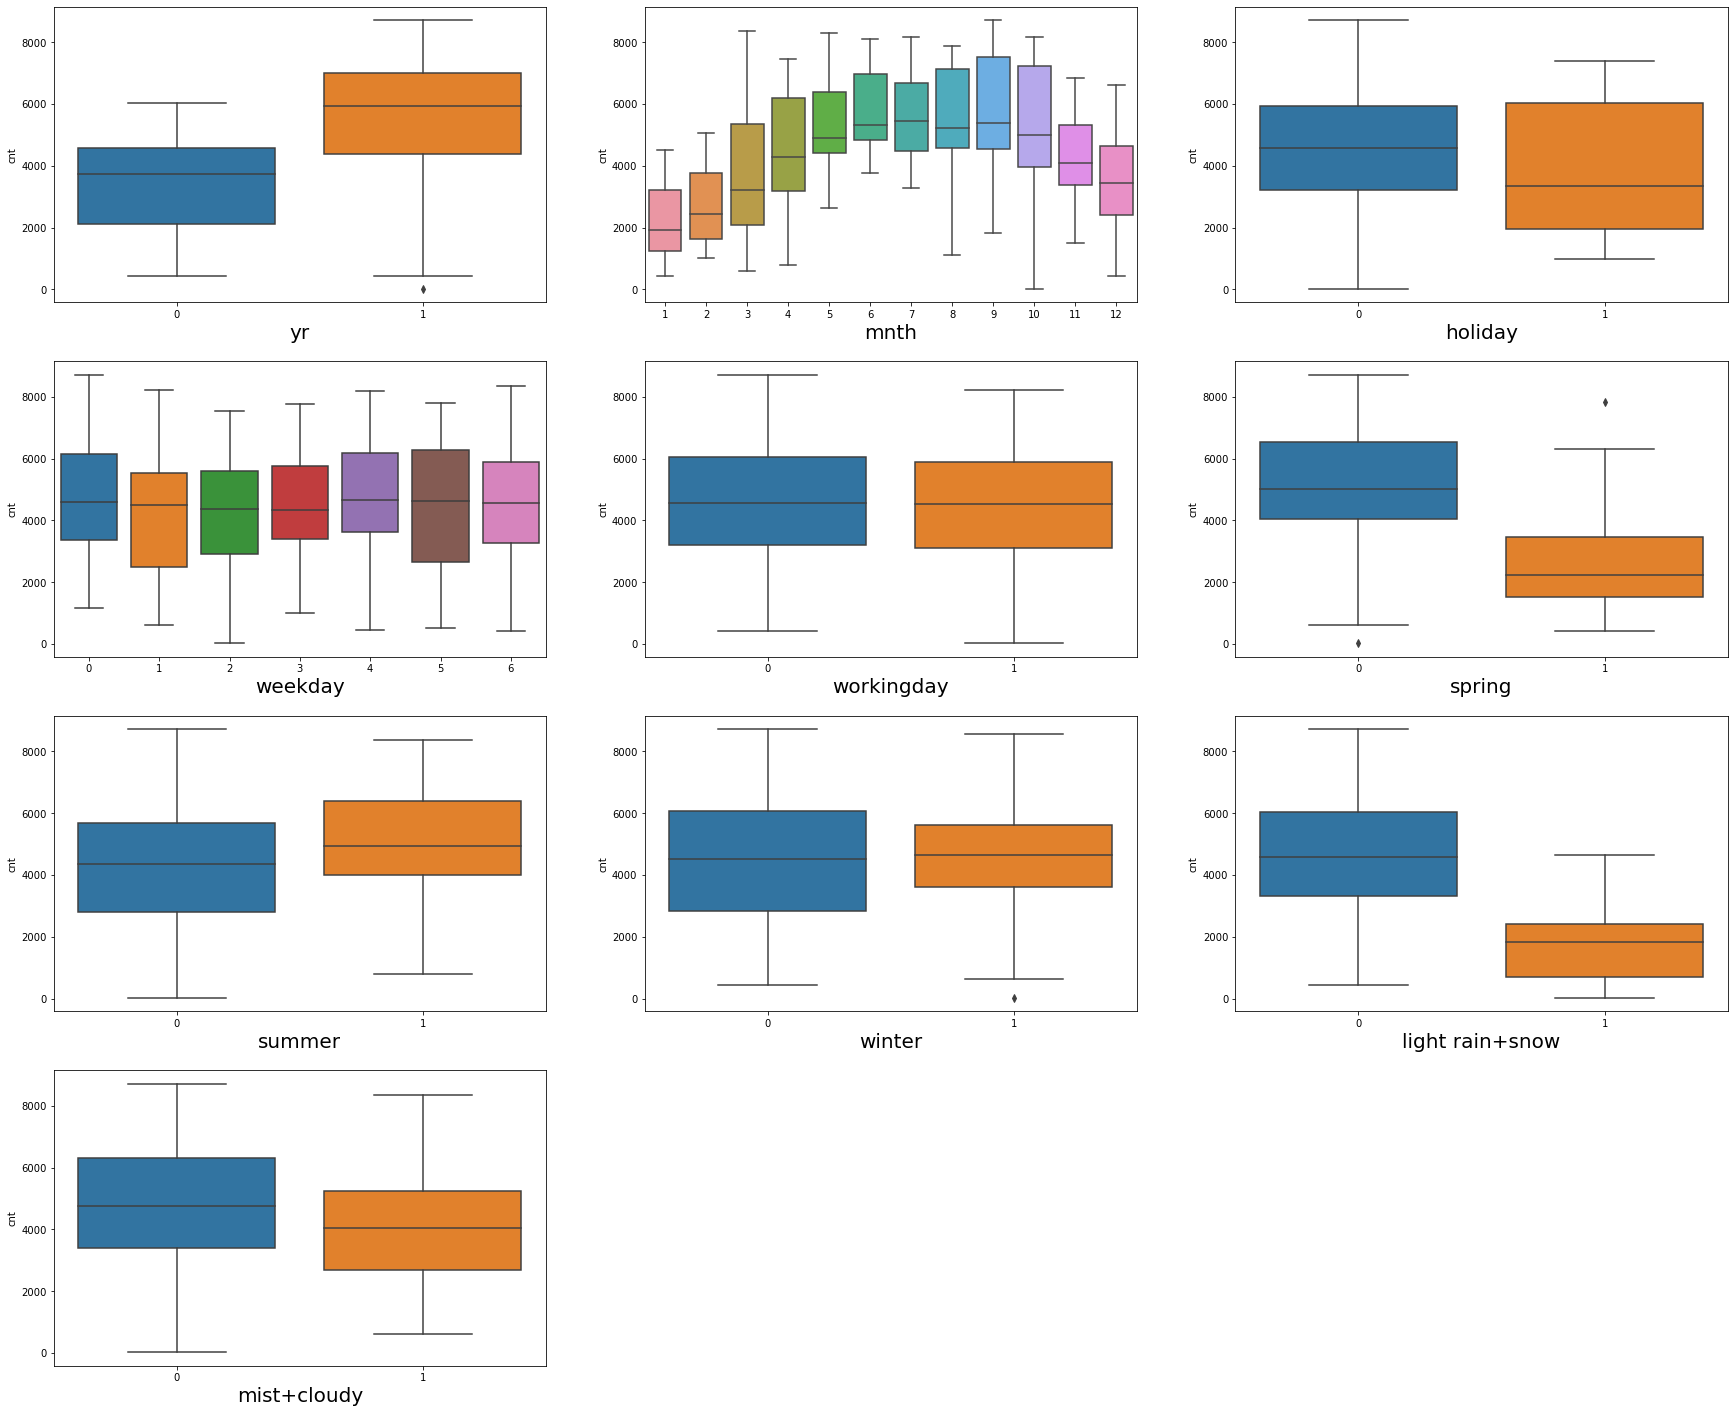

In [32]:
plt.figure(figsize=(30, 25))
n=1
for i in cat_var:
    plt.subplot(4,3,n)
    plt.xlabel(i,fontdict={'fontsize':20})
    sns.boxplot(data=df,x=i,y='cnt')
    n=n+1
    

- we can conclude there are no such outliers that we have to worry about.
- We can see that from months 5 to 9 we have a rse in count. After that it subtly reduces.
- we can also see that if the weather is bad, there is a obvious reduction in count values

Now before proceding with the modeling part, we shall get dummy variables for all the categorical columns. That is we will get dummy variables for 'weekday' and 'mnth'

In [33]:
df['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)

In [34]:
df.mnth.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [35]:
df['mnth'].replace({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'},inplace=True)

In [36]:
day_of_week=pd.get_dummies(df['weekday'],drop_first=True)
month=pd.get_dummies(df['mnth'],drop_first=True)

In [37]:
df=pd.concat([df,day_of_week,month],axis=1)

In [38]:
df.drop(['weekday','mnth'],axis=1,inplace=True)

In [39]:
df.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,light rain+snow,mist+cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sept
0,0,0,1,18.18125,80.5833,10.749882,985,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,1,17.68695,69.6087,16.652113,801,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


Now I think we are done with the EDA and Data preparation part. We will now procede to create our model.

### 1. First step would be apliting the data into training dateset and testing dataset

In [40]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(df,train_size=0.7,random_state=100)

In [41]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,light rain+snow,mist+cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sept
576,1,0,1,33.1448,70.4167,11.083475,7216,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,20.6746,62.1250,10.792293,4066,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
728,1,0,1,11.5850,48.3333,23.500518,1796,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
482,1,0,0,18.8752,48.9583,8.708325,4220,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
111,0,0,0,16.0977,72.9583,14.707907,1683,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,light rain+snow,mist+cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sept
184,0,1,0,33.27085,63.7917,5.459106,6043,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
535,1,0,1,36.04875,59.2083,7.625404,6211,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
299,0,0,0,22.85230,81.2917,13.250121,2659,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
221,0,0,1,34.24915,42.4167,13.417286,4780,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
152,0,0,0,32.19710,30.5000,19.583229,4968,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


### 2. Now after spliting the data, the next step would be scaling the data using MinMax Scaler

In [43]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()

In [44]:
num_var #We have already created a Numeric Variables list 

['atemp', 'hum', 'windspeed', 'cnt']

In [45]:
df_train[num_var]=sc.fit_transform(df_train[num_var])

In [46]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,light rain+snow,mist+cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sept
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
728,1,0,1,0.200348,0.498067,0.663106,0.204096,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
111,0,0,0,0.318819,0.751824,0.380981,0.191095,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 3. Now we will create X_train and y_train from df_train dataset. X_train and y_train are x-axis and y-axis for training dataset.

In [47]:
y_train=df_train.pop('cnt')

In [48]:
X_train=df_train

### 4. Using RFE Approach For Feature Selection. We start with 15 vars and will use mixed approach to build the model.

In [49]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)

In [50]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 5),
 ('summer', True, 1),
 ('winter', True, 1),
 ('light rain+snow', True, 1),
 ('mist+cloudy', True, 1),
 ('Monday', False, 9),
 ('Saturday', False, 3),
 ('Sunday', False, 4),
 ('Thursday', False, 13),
 ('Tuesday', False, 8),
 ('Wednesday', False, 10),
 ('Aug', True, 1),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', False, 11),
 ('Jun', False, 7),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sept', True, 1)]

In [51]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'summer', 'winter',
       'light rain+snow', 'mist+cloudy', 'Aug', 'Dec', 'Feb', 'Jan', 'Nov',
       'Sept'],
      dtype='object')

In [52]:
X_train.columns[~rfe.support_]

Index(['workingday', 'spring', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday', 'Jul', 'Jun', 'Mar', 'May', 'Oct'],
      dtype='object')

In [53]:
X_train_rfe = X_train[col]

### 5. Building Model using Satsmodel

In [54]:
import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe1).fit()

In [55]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     174.4
Date:                Sun, 26 Feb 2023   Prob (F-statistic):          2.92e-186
Time:                        10:53:00   Log-Likelihood:                 508.08
No. Observations:                 510   AIC:                            -984.2
Df Residuals:                     494   BIC:                            -916.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2931      0.032      9.260      0.000       0.231       0.355
yr                  0.2312      0.008     28.305      0.000       0.215       0.247
holiday            -0.0837      0.026     -3.226      0.001      -0.135      -0.033
atemp               0.4782      0.032     14.978      0.000       0.415       0.541
hum                -0.1647      0.038     -4.329      0.000      -0.239      -0.090
windspeed          -0.1771      0.026     -6.783      0.000      -0.228      -0.126
summer              0.0793      0.013      6.295      0.000       0.055       0.104
winter              0.1342      0.014      9.373      0.000       0.106       0.162
light rain+snow    -0.2404      0.027     -9.000      0.000      -0.293      -0.188
mist+cloudy        -0.0554      0.011     -5.240      0.000      -0.076      -0.035
Aug                 0.0606      0.016      3.695      0.000       0.028       0.093
Dec                -0.0486      0.019     -2.622      0.009      -0.085      -0.012
Feb                -0.0497      0.021     -2.348      0.019      -0.091      -0.008
Jan                -0.0762      0.021     -3.577      0.000      -0.118      -0.034
Nov                -0.0417      0.019     -2.186      0.029      -0.079      -0.004
Sept                0.1121      0.017      6.709      0.000       0.079       0.145
==============================================================================
Omnibus:                       66.914   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.141
Skew:                          -0.671   Prob(JB):                     3.08e-37
Kurtosis:                       5.472   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.06
2,atemp,14.42
4,windspeed,3.90
6,winter,3.04
5,summer,2.29
8,mist+cloudy,2.24
0,yr,2.06
12,Jan,1.92
13,Nov,1.87
10,Dec,1.64


Column 'hum' has a very high VIF so we drop it

In [57]:
X_train_rfe=X_train_rfe.drop(['hum'],axis=1)

In [58]:
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [59]:
lm1 = sm.OLS(y_train,X_train_rfe1).fit()

In [60]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     179.1
Date:                Sun, 26 Feb 2023   Prob (F-statistic):          2.01e-183
Time:                        11:00:33   Log-Likelihood:                 498.59
No. Observations:                 510   AIC:                            -967.2
Df Residuals:                     495   BIC:                            -903.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2097      0.026      8.204      0.000       0.160       0.260
yr                  0.2351      0.008     28.454      0.000       0.219       0.251
holiday            -0.0850      0.026     -3.220      0.001      -0.137      -0.033
atemp               0.4446      0.032     14.106      0.000       0.383       0.507
windspeed          -0.1491      0.026     -5.791      0.000      -0.200      -0.098
summer              0.0738      0.013      5.785      0.000       0.049       0.099
winter              0.1226      0.014      8.564      0.000       0.094       0.151
light rain+snow    -0.2863      0.025    -11.474      0.000      -0.335      -0.237
mist+cloudy        -0.0814      0.009     -9.218      0.000      -0.099      -0.064
Aug                 0.0580      0.017      3.474      0.001       0.025       0.091
Dec                -0.0567      0.019     -3.021      0.003      -0.094      -0.020
Feb                -0.0558      0.021     -2.601      0.010      -0.098      -0.014
Jan                -0.0868      0.022     -4.034      0.000      -0.129      -0.045
Nov                -0.0418      0.019     -2.153      0.032      -0.080      -0.004
Sept                0.1048      0.017      6.194      0.000       0.072       0.138
==============================================================================
Omnibus:                       67.110   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.377
Skew:                          -0.678   Prob(JB):                     7.44e-37
Kurtosis:                       5.448   Cond. No.                         16.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.99
3,windspeed,3.83
5,winter,2.63
0,yr,2.06
4,summer,2.06
12,Nov,1.82
8,Aug,1.59
7,mist+cloudy,1.57
9,Dec,1.41
13,Sept,1.35


We should drop 'Nov' and then analyze

In [62]:
X_train_rfe=X_train_rfe.drop(['Nov'],axis=1)

In [63]:
X_train_rfe2 = sm.add_constant(X_train_rfe)
lm2 = sm.OLS(y_train,X_train_rfe2).fit()

In [64]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     191.1
Date:                Sun, 26 Feb 2023   Prob (F-statistic):          1.42e-183
Time:                        11:04:29   Log-Likelihood:                 496.21
No. Observations:                 510   AIC:                            -964.4
Df Residuals:                     496   BIC:                            -905.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1958      0.025      7.888      0.000       0.147       0.245
yr                  0.2350      0.008     28.337      0.000       0.219       0.251
holiday            -0.0919      0.026     -3.494      0.001      -0.144      -0.040
atemp               0.4618      0.031     15.087      0.000       0.402       0.522
windspeed          -0.1484      0.026     -5.745      0.000      -0.199      -0.098
summer              0.0776      0.013      6.118      0.000       0.053       0.103
winter              0.1096      0.013      8.410      0.000       0.084       0.135
light rain+snow    -0.2821      0.025    -11.299      0.000      -0.331      -0.233
mist+cloudy        -0.0808      0.009     -9.114      0.000      -0.098      -0.063
Aug                 0.0587      0.017      3.505      0.000       0.026       0.092
Dec                -0.0397      0.017     -2.325      0.020      -0.073      -0.006
Feb                -0.0468      0.021     -2.215      0.027      -0.088      -0.005
Jan                -0.0766      0.021     -3.635      0.000      -0.118      -0.035
Sept                0.1099      0.017      6.540      0.000       0.077       0.143
==============================================================================
Omnibus:                       60.562   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.803
Skew:                          -0.628   Prob(JB):                     5.94e-32
Kurtosis:                       5.279   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.96
3,windspeed,3.76
0,yr,2.06
4,summer,2.05
5,winter,1.79
8,Aug,1.59
7,mist+cloudy,1.57
12,Sept,1.33
11,Jan,1.28
10,Feb,1.26


- We can see that we have we have a adjusted R2 of 82.9. 
- This is a very good R2 with no insignificant variable in the model. 
- Also all the variables have a VIF under 5. This indicates that there is no case of multicolinearity.

### 6. Residual Analysis

In [69]:
y_pred= lm2.predict(X_train_rfe2)
res= y_train-y_pred

In [71]:
import matplotlib.pyplot as plt, seaborn as sns

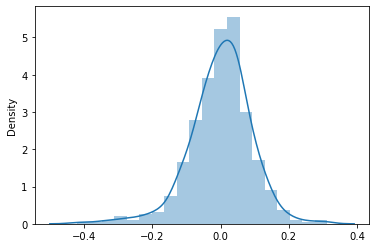

In [73]:
sns.distplot(res, bins = 20)
plt.show()

### Making predictions on Test dataset using final model

1. Scaling the Test dataset

In [74]:
num_var

['atemp', 'hum', 'windspeed', 'cnt']

In [77]:
df_test[num_var] = sc.fit_transform(df_test[num_var])

2. Spliting data into train test

In [80]:
y_test = df_test.pop('cnt')
X_test = df_test

3. Droping that perticular variables which are droped from training dataset 

In [81]:
X_train_new=X_train_rfe2.drop(['const'], axis=1)
X_test_new = X_test[X_train_new.columns]

4. Adding constant

In [82]:
X_test_new = sm.add_constant(X_test_new)

5. Making predictions on Test dataset

In [83]:
y_pred = lm2.predict(X_test_new)

6. Model Evaluation

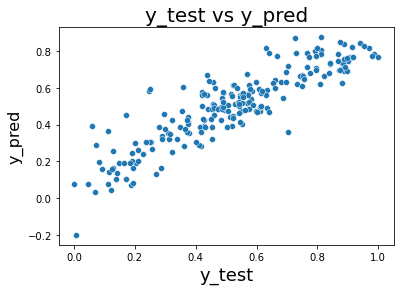

In [87]:
sns.scatterplot(y_test,y_pred)
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)              
plt.ylabel('y_pred', fontsize=16)     
plt.show()

Now we will check for R2 and Mean_square_error for the test dataset

In [88]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [89]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.10949771406079534

In [90]:
r2_score(y_test, y_pred)

0.7900169558752083

We have a model that seems good enough to predict demand of bikes. The actual and predicted 'cnt' significantly overlapped, also the R2 values of Train Model and Test model are very close to each other. Thus indicating that the model is able to explain the change in demand very well.

In [92]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     191.1
Date:                Sun, 26 Feb 2023   Prob (F-statistic):          1.42e-183
Time:                        12:57:07   Log-Likelihood:                 496.21
No. Observations:                 510   AIC:                            -964.4
Df Residuals:                     496   BIC:                            -905.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1958      0.025      7.888      0.000       0.147       0.245
yr                  0.2350      0.008     28.337      0.000       0.219       0.251
holiday            -0.0919      0.026     -3.494      0.001      -0.144      -0.040
atemp               0.4618      0.031     15.087      0.000       0.402       0.522
windspeed          -0.1484      0.026     -5.745      0.000      -0.199      -0.098
summer              0.0776      0.013      6.118      0.000       0.053       0.103
winter              0.1096      0.013      8.410      0.000       0.084       0.135
light rain+snow    -0.2821      0.025    -11.299      0.000      -0.331      -0.233
mist+cloudy        -0.0808      0.009     -9.114      0.000      -0.098      -0.063
Aug                 0.0587      0.017      3.505      0.000       0.026       0.092
Dec                -0.0397      0.017     -2.325      0.020      -0.073      -0.006
Feb                -0.0468      0.021     -2.215      0.027      -0.088      -0.005
Jan                -0.0766      0.021     -3.635      0.000      -0.118      -0.035
Sept                0.1099      0.017      6.540      0.000       0.077       0.143
==============================================================================
Omnibus:                       60.562   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.803
Skew:                          -0.628   Prob(JB):                     5.94e-32
Kurtosis:                       5.279   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The variables that are highly responsible for high count of bikes (that is more demand for bikes) are:

1. Year
2. Temperature (Feels like)
3. Windspeed
4. Holiday

Also demands are higher in the months from April to September.